In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Leitura dos arquivos CSV
df_vendas = pd.read_csv('..\\BASE_DADOS\\olist_order_items_dataset.csv')
df_revisao_pedidos = pd.read_csv('..\\BASE_DADOS\\olist_order_reviews_dataset.csv')
df_produtos = pd.read_csv('..\\BASE_DADOS\\olist_products_dataset.csv')

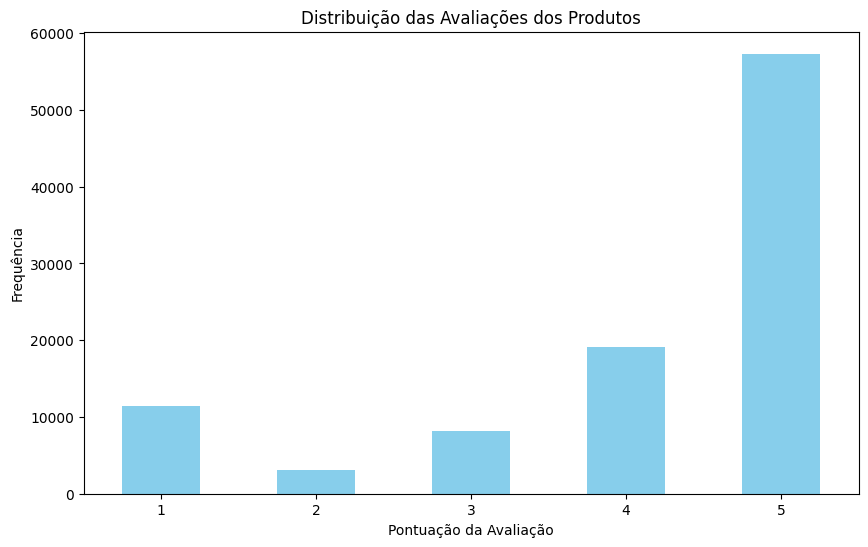

Produtos com as melhores avaliações:


,product_id,product_category_name,review_score
0,00066f42aeeb9f3007548bb9d3f33c38,perfumaria,5.0
3,000b8f95fcb9e0096488278317764d19,utilidades_domesticas,5.0
4,000d9be29b5207b54e86aa1b1ac54872,relogios_presentes,5.0
6,00126f27c813603687e6ce486d909d01,cool_stuff,5.0
8,001b237c0e9bb435f2e54071129237e9,cama_mesa_banho,5.0
10,001c5d71ac6ad696d22315953758fa04,cama_mesa_banho,5.0
13,0021a87d4997a48b6cef1665602be0f5,informatica_acessorios,5.0
16,002959d7a0b0990fe2d69988affcbc80,moveis_decoracao,5.0
17,002af88741ba70c7b5cf4e4a0ad7ef85,cool_stuff,5.0
18,002c6dab60557c48cfd6c2222ef7fd76,brinquedos,5.0


In [5]:
#3.	Análise de Satisfação do Cliente
#a.	Avaliações de Produtos: Analisar a distribuição das avaliações dos produtos 
#e identificar os produtos com as melhores e piores avaliações.

# Carregamento dos dados
avaliacoes = df_revisao_pedidos
produtos = df_produtos
vendas = df_vendas

# Mesclagem das tabelas de avaliações e vendas
dados_mesclados = pd.merge(avaliacoes, vendas, on='order_id')

# Mesclagem da tabela de produtos
dados_mesclados = pd.merge(dados_mesclados, produtos, on='product_id')

# Distribuição das avaliações
distribuicao_avaliacoes = avaliacoes['review_score'].value_counts().sort_index()


# Média das avaliações para cada produto
media_avaliacoes_produto = dados_mesclados.groupby(['product_id', 'product_category_name'])['review_score'].mean().reset_index()

# Produtos com as melhores e piores avaliações
melhores_produtos = media_avaliacoes_produto.nlargest(10, 'review_score')
piores_produtos = media_avaliacoes_produto.nsmallest(10, 'review_score')

melhores_produtos = pd.DataFrame(melhores_produtos)
piores_produtos = pd.DataFrame(piores_produtos)


# RESULTADOS

# Gráfico da distribuição das avaliações
plt.figure(figsize=(10, 6))
distribuicao_avaliacoes.plot(kind='bar', color='skyblue')
plt.title('Distribuição das Avaliações dos Produtos')
plt.xlabel('Pontuação da Avaliação')
plt.ylabel('Frequência')
plt.xticks(rotation=0)
plt.show()

print("Produtos com as melhores avaliações:")
melhores_produtos




In [6]:
print("Produtos com as piores avaliações:")
piores_produtos

Produtos com as piores avaliações:


,product_id,product_category_name,review_score
2,0009406fd7479715e4bef61dd91f2462,cama_mesa_banho,1.0
5,0011c512eb256aa0dbbb544d8dffcf6e,automotivo,1.0
19,002d4ea7c04739c130bb74d7e7cd1694,pet_shop,1.0
32,0043c62d00db47eff6a6bc4cf6bfaeda,esporte_lazer,1.0
33,0043d1a25ef08fb6f41b8fa6f91742ab,construcao_ferramentas_construcao,1.0
40,0060b415594c5e1200324ef1a18493c4,esporte_lazer,1.0
86,00cf06147ed4880ec5fbba2adbb20e1d,livros_interesse_geral,1.0
104,00e62bcf9337ca4c5d5b4c5c8188f8d2,beleza_saude,1.0
106,00efb9a8ce0cf3b2f37892ab003edc10,esporte_lazer,1.0
118,01084e8138d03dc691daa19aa6c12471,moveis_decoracao,1.0
